In [377]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [378]:
data = pd.read_csv('sales.csv')

C:\Users\abrar\AppData\Local\Temp\ipykernel_7356\4197442783.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('sales.csv')


In [379]:
data.head()


,Unnamed: 0,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,260670,166,2,2013-01-01,0,0,0,a,1,0
1,366950,278,2,2013-01-01,0,0,0,a,1,0
2,179596,519,2,2013-01-01,0,0,0,a,1,0
3,216955,234,2,2013-01-01,0,0,0,a,1,0
4,201196,270,2,2013-01-01,0,0,0,a,1,0


In [380]:
data.head()
data['state_holiday'].unique()

array(['a', '0', 'b', 'c', 0], dtype=object)

In [381]:
data['school_holiday'].unique()

array([1, 0], dtype=int64)

In [382]:
data['open'].unique()

array([0, 1], dtype=int64)

In [383]:
data['promotion'].unique()
data.all().isna
data.describe()


,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000,592561.000000
mean,356039.480762,558.463546,4.002315,634.848002,0.831509,0.379419,0.181418,5744.577431
std,205596.545847,321.957991,1.995855,465.330476,0.374302,0.485243,0.385364,3832.896126
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,177871.000000,280.000000,2.000000,404.000000,1.000000,0.000000,0.000000,3703.000000
50%,356159.000000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5702.000000
75%,534138.000000,837.000000,6.000000,839.000000,1.000000,1.000000,0.000000,7808.000000
max,712044.000000,1115.000000,7.000000,5494.000000,1.000000,1.000000,1.000000,38037.000000


In [384]:
df = data.drop(columns=['Unnamed: 0'],axis=1)
df.head(5)


,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,166,2,2013-01-01,0,0,0,a,1,0
1,278,2,2013-01-01,0,0,0,a,1,0
2,519,2,2013-01-01,0,0,0,a,1,0
3,234,2,2013-01-01,0,0,0,a,1,0
4,270,2,2013-01-01,0,0,0,a,1,0


In [385]:


df['state_holiday'].replace({"c":1, "a":1, "b":1, '0':0}, inplace=True)
df['state_holiday'] = df['state_holiday'].astype('Int64')
df['state_holiday'].unique()


<IntegerArray>
[1, 0]
Length: 2, dtype: Int64

In [386]:
df.all().isnull()
data['date'] = pd.to_datetime(data['date'])
print(data.dtypes)
data['date'].describe()

Unnamed: 0                      int64
store_ID                        int64
day_of_week                     int64
date                   datetime64[ns]
nb_customers_on_day             int64
open                            int64
promotion                       int64
state_holiday                  object
school_holiday                  int64
sales                           int64
dtype: object


count                           592561
mean     2014-01-20 13:08:34.185037312
min                2013-01-01 00:00:00
25%                2013-07-09 00:00:00
50%                2014-01-15 00:00:00
75%                2014-07-28 00:00:00
max                2015-02-28 00:00:00
Name: date, dtype: object

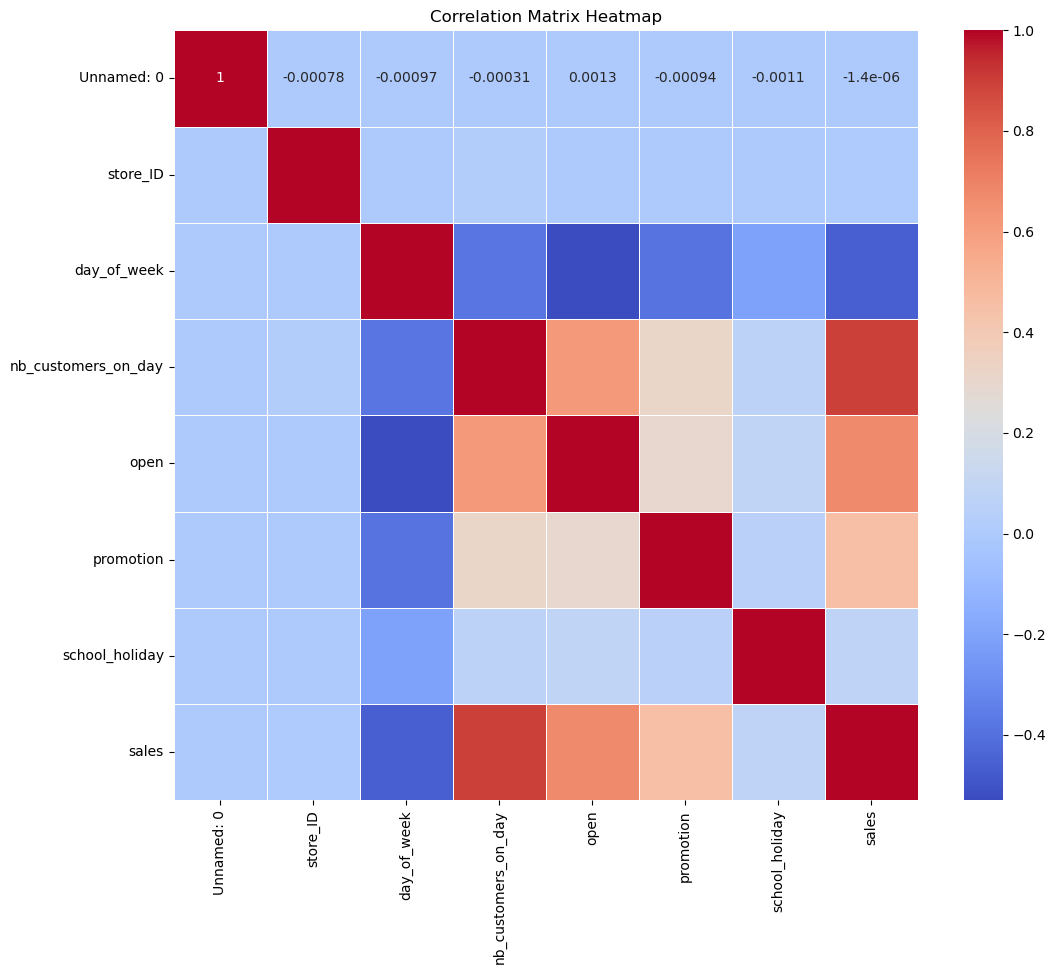

'\nnum = df.corr()\nplt.Figure(figsize=(50,50))\nsns.heatmap(num, cmap="coolwarm", fmt=".2f", linewidths=0.7)\nplt.title("Correlation")\nplt.show()\n'

In [ ]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlations = numeric_data.corr()

correlations = numeric_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(50,50))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

'''
num = df.corr()
plt.Figure(figsize=(50,50))
sns.heatmap(num, cmap="coolwarm", fmt=".2f", linewidths=0.7)
plt.title("Correlation")
plt.show()
'''


Splitting The Data into Training And Testing Dataset

In [388]:
data['date'] = pd.to_datetime(data['date'])

# Encode categorical variables
data = pd.get_dummies(data, columns=['day_of_week', 'state_holiday'])  # One-hot encode 'day_of_week' and 'state_holiday'

X = data.drop(columns=['sales', 'date'])  # Features
y = data['sales']  # Target variable


In [389]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [390]:
# Initialize and train a Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [391]:
predictions = rf.predict(X_test)
print(predictions)

[    0.    7852.05     0.   ... 10687.43  5114.07  5016.92]


In [392]:
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')


Mean Absolute Error (MAE): 449.08456118738025
R-squared (R2) Score: 0.9608881317038233
